In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

<h3>Loading Data</h3>

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<h3> Univariate Analysis</h3>

In [3]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [4]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [5]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [6]:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print(categorical_variables)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [7]:
#finding each types of category in each column
train[categorical_variables].apply(lambda x : len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [8]:
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [9]:
train['Race'].value_counts()/train.shape[0]
#notice that 85% are whitte people

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [10]:
train['Education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

In [11]:
train['Education'].value_counts()/train.shape[0]

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: Education, dtype: float64

<h2>Multivariate Analysis</h2>

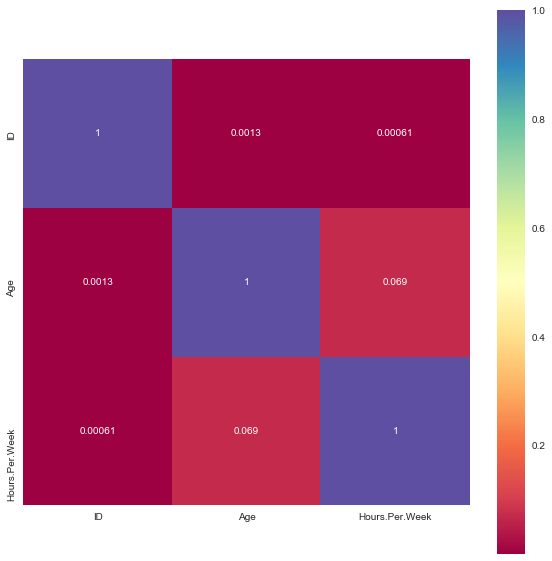

In [12]:
correlation = train.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Spectral')

<h3 style='color:#1b4891'>(a) Both Categorical</h3>

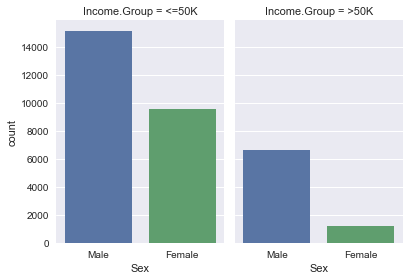

In [13]:
  sns.factorplot(x="Sex", col="Income.Group",data=train, kind="count",size=4, aspect=.7)

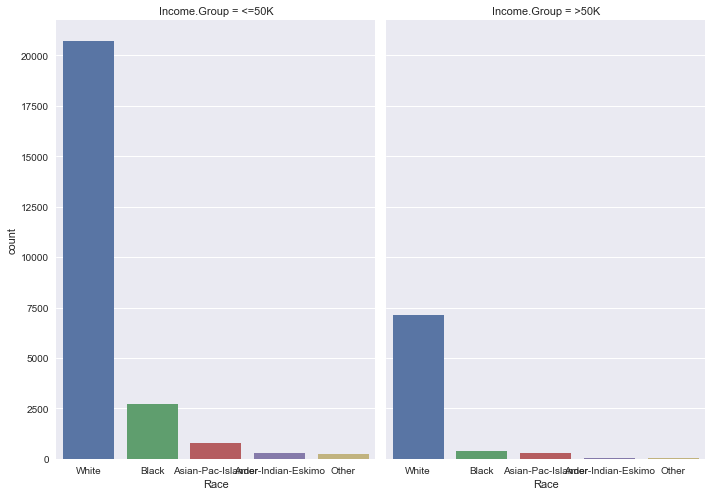

In [14]:
  sns.factorplot(x="Race", col="Income.Group",data=train, kind="count",size=7, aspect=.7)

<h3 style='color:#1b4891'>(b) Both Continous</h3>

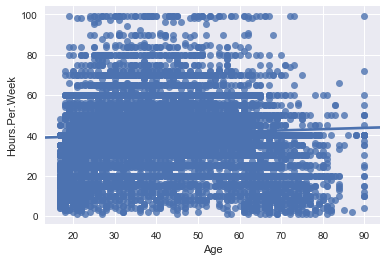

In [15]:
sns.regplot(x="Age", y="Hours.Per.Week", data=train)

<p>This shows no real relationship between Age and Hours-Per-Week. Even intuitively we were not expecting any specific trend so this is good. In other cases, you might figure out interesting trends which can be exploited.</p>

<h3 style='color:#1b4891'>(b) Categorical-Continous Combination</h3>

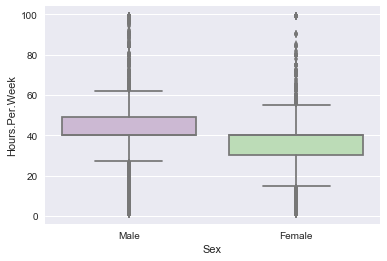

In [16]:
sns.boxplot(x="Sex", y="Hours.Per.Week",data=train, palette="PRGn")

<p>we can make the following inferences:
The median of male and female working hours are same
For Males, the 25% and median values are same
For females, the median and 75% are same.
Males have higher working hours in general because the 75% percentile of female corressponds to 25% percentile of males.</p>

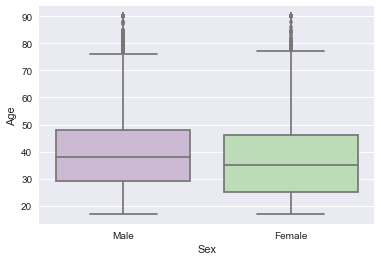

In [17]:
sns.boxplot(x="Sex", y="Age",data=train, palette="PRGn")

<h2>Missing Value Treatment</h2>

In [18]:
train.isnull().sum()

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [19]:
test.isnull().sum()

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [20]:
train['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [21]:
train['Workclass'].fillna(train['Workclass'].mode()[0], inplace=True)
test['Workclass'].fillna(test['Workclass'].mode()[0], inplace=True)

In [22]:
train.isnull().sum()

ID                   0
Age                  0
Workclass            0
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [23]:
train['Occupation'].fillna(train['Occupation'].mode()[0], inplace=True)
test['Occupation'].fillna(test['Occupation'].mode()[0], inplace=True)

In [24]:
train['Native.Country'].fillna(train['Native.Country'].mode()[0], inplace=True)
test['Native.Country'].fillna(test['Native.Country'].mode()[0], inplace=True)

<h2>Outlier Detection</h2>

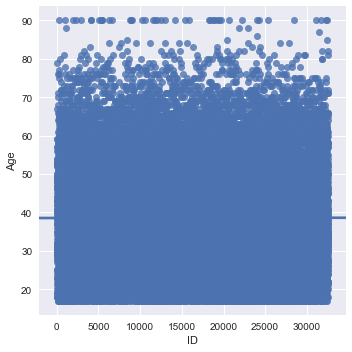

In [25]:
sns.lmplot(x="ID", y="Age", data=train)

<p>No outlier detected</p>

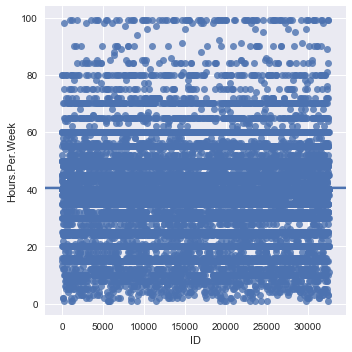

In [26]:
sns.lmplot(x="ID", y="Hours.Per.Week", data=train)

<p>No outlier detected</p>

<h2>Variable Transformation/Feature Engineering</h2>

In [27]:
train['Income.Group'] = train['Income.Group'].map({'<=50K': 0, '>50K': 1}).astype(int)


<h4> Working with workclass</h4>

In [28]:
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [29]:
#lets combine categories with less than 5% of the values.
categories_to_combine=['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']

In [30]:
for each_c in categories_to_combine:
    train['Workclass']=train['Workclass'].replace({each_c:'Others'})
    test['Workclass']=test['Workclass'].replace({each_c:'Others'})

In [31]:
#checking new categories in train & test
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

<h4>Working with race</h4>

In [32]:
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [33]:
train["Race"] = train["Race"].replace(['Asian-Pac-Islander','Amer-Indian-Eskimo','Other'], 'Others')
test["Race"] = test["Race"].replace(['Asian-Pac-Islander','Amer-Indian-Eskimo','Other'], 'Others')


In [34]:
train['Race'].value_counts()/train.shape[0]

White     0.854274
Black     0.095943
Others    0.049783
Name: Race, dtype: float64

<h4>Working with Education</h4>

In [35]:
train['Education'].value_counts()/train.shape[0]

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: Education, dtype: float64

In [36]:
train["Education"] = train["Education"].replace(['11th','Assoc-acdm','10th','7th-8th','Prof-school','9th','12th','5th-6th','1st-4th','Preschool'], 'School')
test["Education"] = test["Education"].replace(['11th','Assoc-acdm','10th','7th-8th','Prof-school','9th','12th','5th-6th','1st-4th','Preschool'], 'School')


In [37]:
train['Education'].value_counts()/train.shape[0]

HS-grad         0.322502
Some-college    0.223918
School          0.181076
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
Doctorate       0.012684
Name: Education, dtype: float64

<h4>Working with Occupation</h4>

In [38]:
train['Occupation'].value_counts()/train.shape[0]

Prof-specialty       0.183747
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: Occupation, dtype: float64

In [39]:
train["Occupation"] = train["Occupation"].replace(['Prof-specialty','Exec-managerial','Adm-clerical','Sales','Tech-support'], 'white_collar')
train["Occupation"] = train["Occupation"].replace(['Craft-repair','Other-service','Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing','Armed-Forces','Protective-serv','Priv-house-serv'], 'blue_collar')
test["Occupation"] = test["Occupation"].replace(['Prof-specialty','Exec-managerial','Adm-clerical','Sales','Tech-support'], 'white_collar')
test["Occupation"] = test["Occupation"].replace(['Craft-repair','Other-service','Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing','Armed-Forces','Protective-serv','Priv-house-serv'], 'blue_collar')


In [40]:
train['Occupation'].value_counts()/train.shape[0]

white_collar    0.565001
blue_collar     0.434999
Name: Occupation, dtype: float64

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for each_v in categorical_variables :
    train[each_v]=le.fit_transform(train[each_v])
    train[each_v]=le.fit_transform(train[each_v])

In [42]:
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int64
dtype: object

<h2>Fitting the Model</h2>

In [43]:
#Labelling the dataset
X = train.loc[:,['Age','Marital.Status','Education','Occupation','Relationship','Race','Sex','Hours.Per.Week','Native.Country','Workclass']]
y = train.loc[:,'Income.Group'] 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Applying PCA Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [46]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [47]:
cm

array([[4205,  713],
       [ 897,  698]])

In [48]:
# Applying k-Fold Cross Validation on Decision Tree
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.752571697167
0.00570031476477


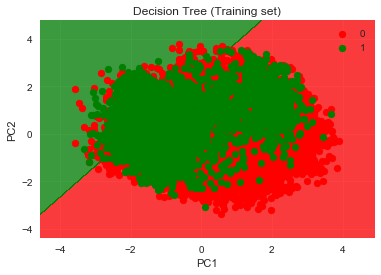

In [60]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

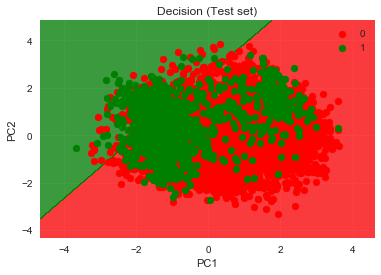

In [62]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()